In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Set pandas display precision for floats
pd.set_option('display.precision', 4)  # Set to 4 decimal places

In [ ]:
filepath = '/content/parkinsons_disease_data.csv'
df = pd.read_csv(filepath)

In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.6199,0,5.1082,1.3807,3.8940,...,1.5724,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.2473,1,6.0276,8.4098,8.5134,...,4.7876,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.3682,0,2.2421,0.2133,6.4988,...,2.1307,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.4546,0,5.9978,1.3750,6.7150,...,3.3913,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.6160,0,9.7752,1.1886,4.6576,...,3.2010,0,0,0,1,0,1,0,0,DrXXXConfid


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [ ]:
#  No null values
print('Columns with count of NaN values:')
df.isna().sum()

Columns with count of NaN values:


,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [ ]:
duplicated_rows = df.duplicated().sum()
print('Number of duplicate rows:', duplicated_rows )

Number of duplicate rows: 0


In [ ]:
#  What is the distribution of the target variable?
df['Diagnosis'].value_counts()

,count
Diagnosis,
1,1304
0,801


In [ ]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2.1050e+03,...,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000
mean,4110.0000,69.6019,0.4926,0.6926,1.3373,27.2095,0.2964,10.0404,5.0167,4.9129e+00,...,15.0943,4.9897,0.4318,0.2527,0.2076,0.1387,0.2950,0.2451,0.2969,0.6195
std,607.8055,11.5945,0.5001,1.0038,0.8958,7.2081,0.4568,5.6870,2.8909,2.8721e+00,...,8.6430,2.9339,0.4954,0.4347,0.4057,0.3457,0.4562,0.4303,0.4570,0.4856
min,3058.0000,50.0000,0.0000,0.0000,0.0000,15.0083,0.0000,0.0022,0.0042,1.0538e-05,...,0.0212,0.0015,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,3584.0000,60.0000,0.0000,0.0000,1.0000,20.7822,0.0000,5.1503,2.4557,2.4785e+00,...,7.5172,2.4159,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,4110.0000,70.0000,0.0000,0.0000,1.0000,27.1846,0.0000,10.0703,5.0316,4.8252e+00,...,14.9636,4.9832,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,4636.0000,80.0000,1.0000,1.0000,2.0000,33.4625,1.0000,14.8296,7.5128,7.3815e+00,...,22.6084,7.4842,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000
max,5162.0000,89.0000,1.0000,3.0000,3.0000,39.9999,1.0000,19.9889,9.9953,9.9959e+00,...,29.9701,9.9927,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
df.describe(include='object')

,DoctorInCharge
count,2105
unique,1
top,DrXXXConfid
freq,2105


In [ ]:
columns = list(df.columns[1:34])
df[columns]

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.6199,0,5.1082,1.3807,3.8940,9.2832,...,29.1813,1.5724,1,0,0,0,0,0,0,0
1,75,0,0,2,16.2473,1,6.0276,8.4098,8.5134,5.6025,...,12.3326,4.7876,0,1,0,1,0,1,0,1
2,70,1,0,0,15.3682,0,2.2421,0.2133,6.4988,9.9298,...,29.9278,2.1307,1,0,0,0,1,0,1,1
3,52,0,0,0,15.4546,0,5.9978,1.3750,6.7150,4.1962,...,21.3043,3.3913,1,1,1,0,0,0,1,1
4,87,0,0,1,18.6160,0,9.7752,1.1886,4.6576,9.3639,...,8.3364,3.2010,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,87,1,0,2,38.4838,0,12.6744,5.3259,5.9473,6.2962,...,28.6340,8.0763,1,0,0,0,1,1,0,0
2101,67,0,0,1,33.6944,1,0.9770,0.1086,4.8252,6.3423,...,13.1065,1.6658,0,0,0,1,0,1,1,1
2102,65,0,0,2,22.8296,0,6.1523,5.7751,0.3342,9.7400,...,26.5277,4.7856,0,0,0,0,1,1,0,1
2103,61,1,0,0,16.8710,1,0.2921,2.2805,9.5985,8.2894,...,19.8734,8.3790,1,0,1,0,0,1,1,1


In [ ]:
#  Create dataframes with categorical data and with continous data
df_categorical = df.loc[:,df.nunique() < 6]
cat_columns = df_categorical.iloc[:, :-1].columns
df_continuous = df.loc[:,df.nunique() >= 6]
cont_columns = df_continuous.columns

In [ ]:
df_continuous = df_continuous.assign(Diagnosis=df['Diagnosis'])
df_continuous.head()

,PatientID,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Diagnosis
0,3058,85,19.6199,5.1082,1.3807,3.8940,9.2832,129,60,222.8423,148.1256,37.8678,337.3071,6.4587,29.1813,1.5724,0
1,3059,75,16.2473,6.0276,8.4098,8.5134,5.6025,163,76,210.5011,153.7565,77.2281,264.6355,37.3067,12.3326,4.7876,1
2,3060,70,15.3682,2.2421,0.2133,6.4988,9.9298,113,93,287.3880,118.7026,85.5883,395.6626,67.8382,29.9278,2.1307,1
3,3061,52,15.4546,5.9978,1.3750,6.7150,4.1962,146,78,280.3395,136.2992,51.8696,362.1897,52.9647,21.3043,3.3913,1
4,3062,87,18.6160,9.7752,1.1886,4.6576,9.3639,115,94,284.0142,108.4495,25.0694,149.9566,21.8049,8.3364,3.2010,0


6 3


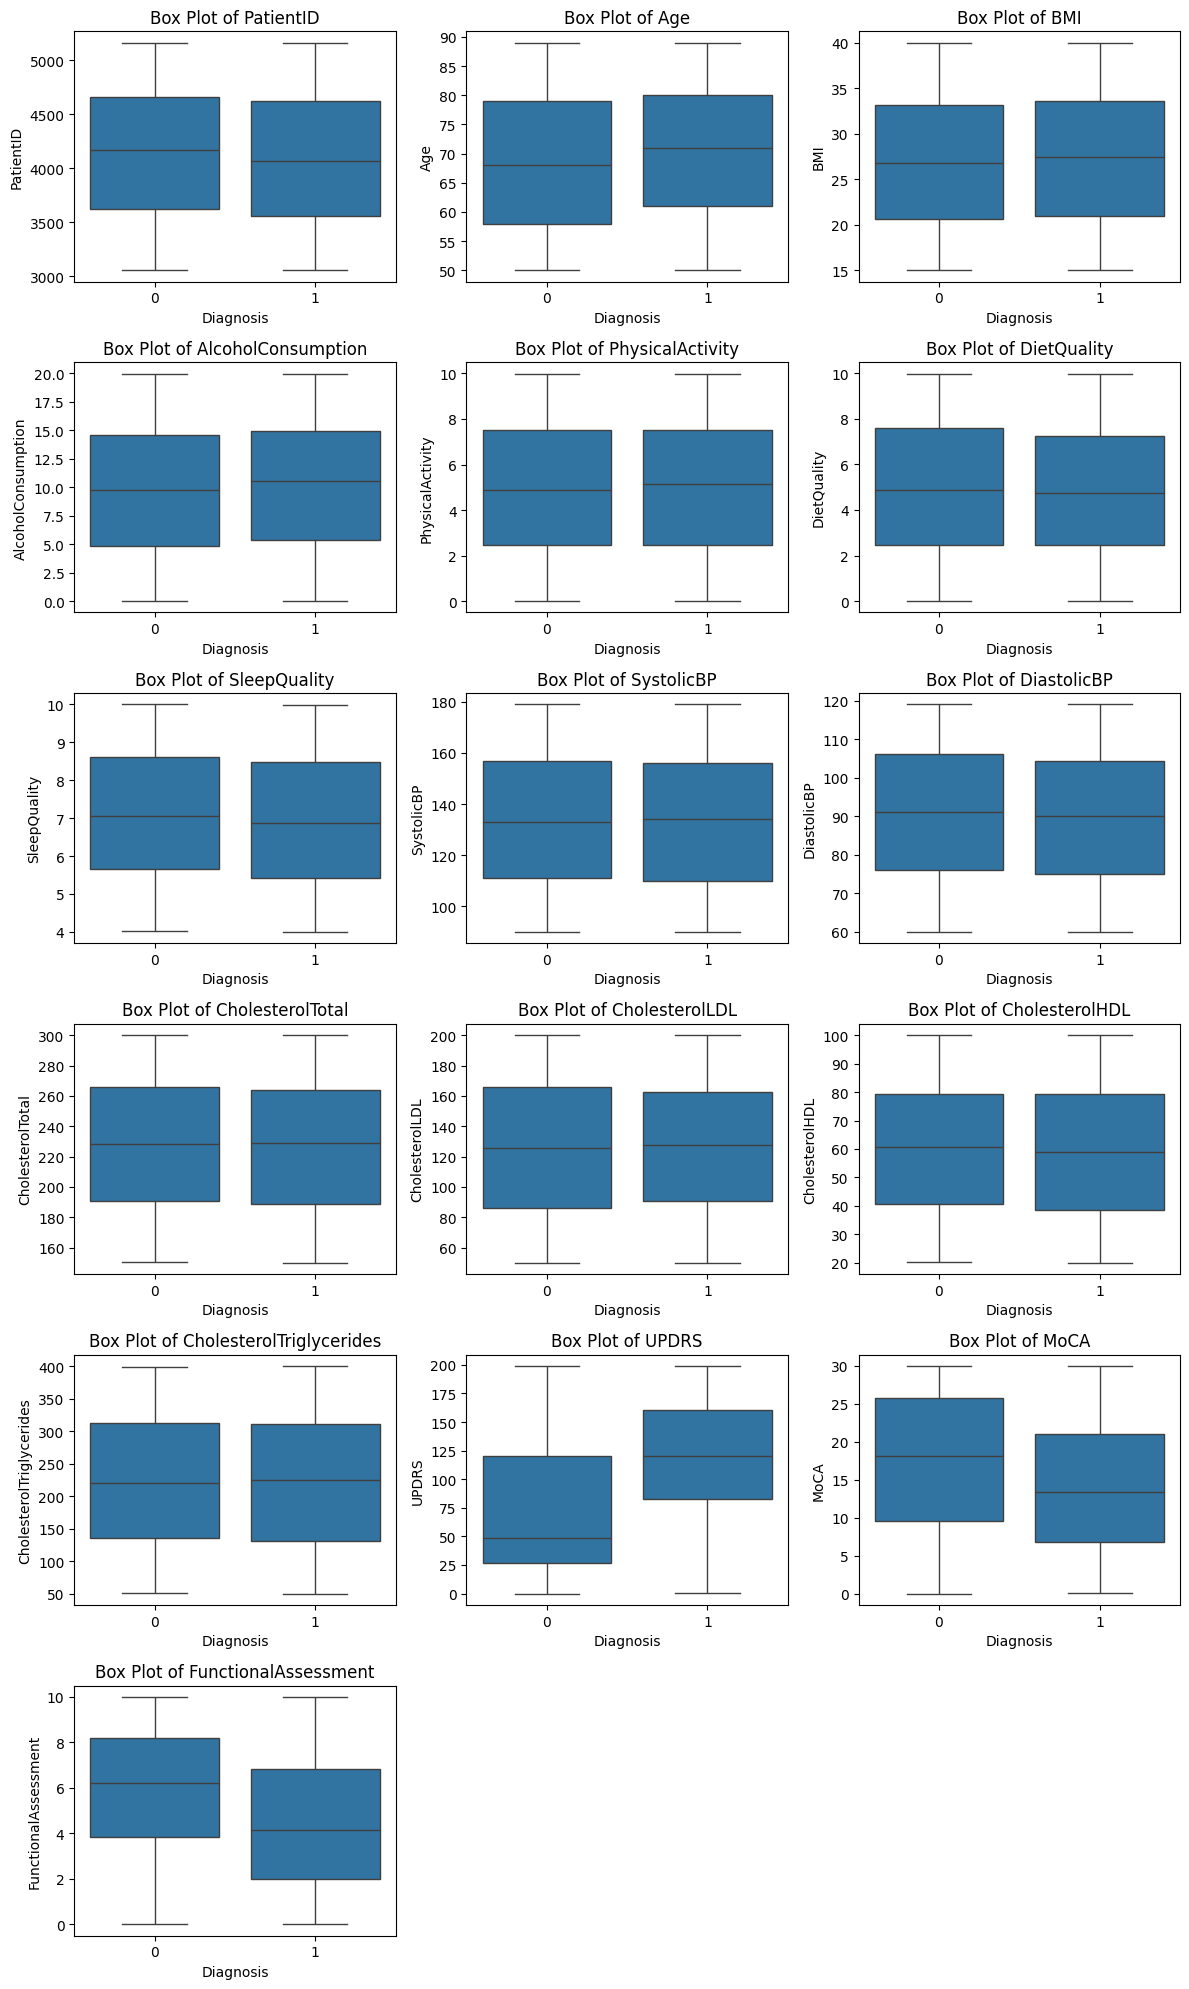

In [ ]:
#  Show a box plot of continous variables with and without a parkinsons diagnosis.
plot_columns = 3
plot_rows = math.ceil(len(cont_columns) / plot_columns)
print(plot_rows, plot_columns)
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,20))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(cont_columns):
    # df_count = df_continuous.groupby('Diagnosis').agg({col: 'count'}).reset_index()
    sns.boxplot(x='Diagnosis', y=col, data=df_continuous, ax=axs[i])
    axs[i].set_title(f'Box Plot of {col}')
    axs[i].set_ylabel(col)


axs[-2].set_visible(False)
axs[-1].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
pd.option_context('mode.use_inf_as_na', True)

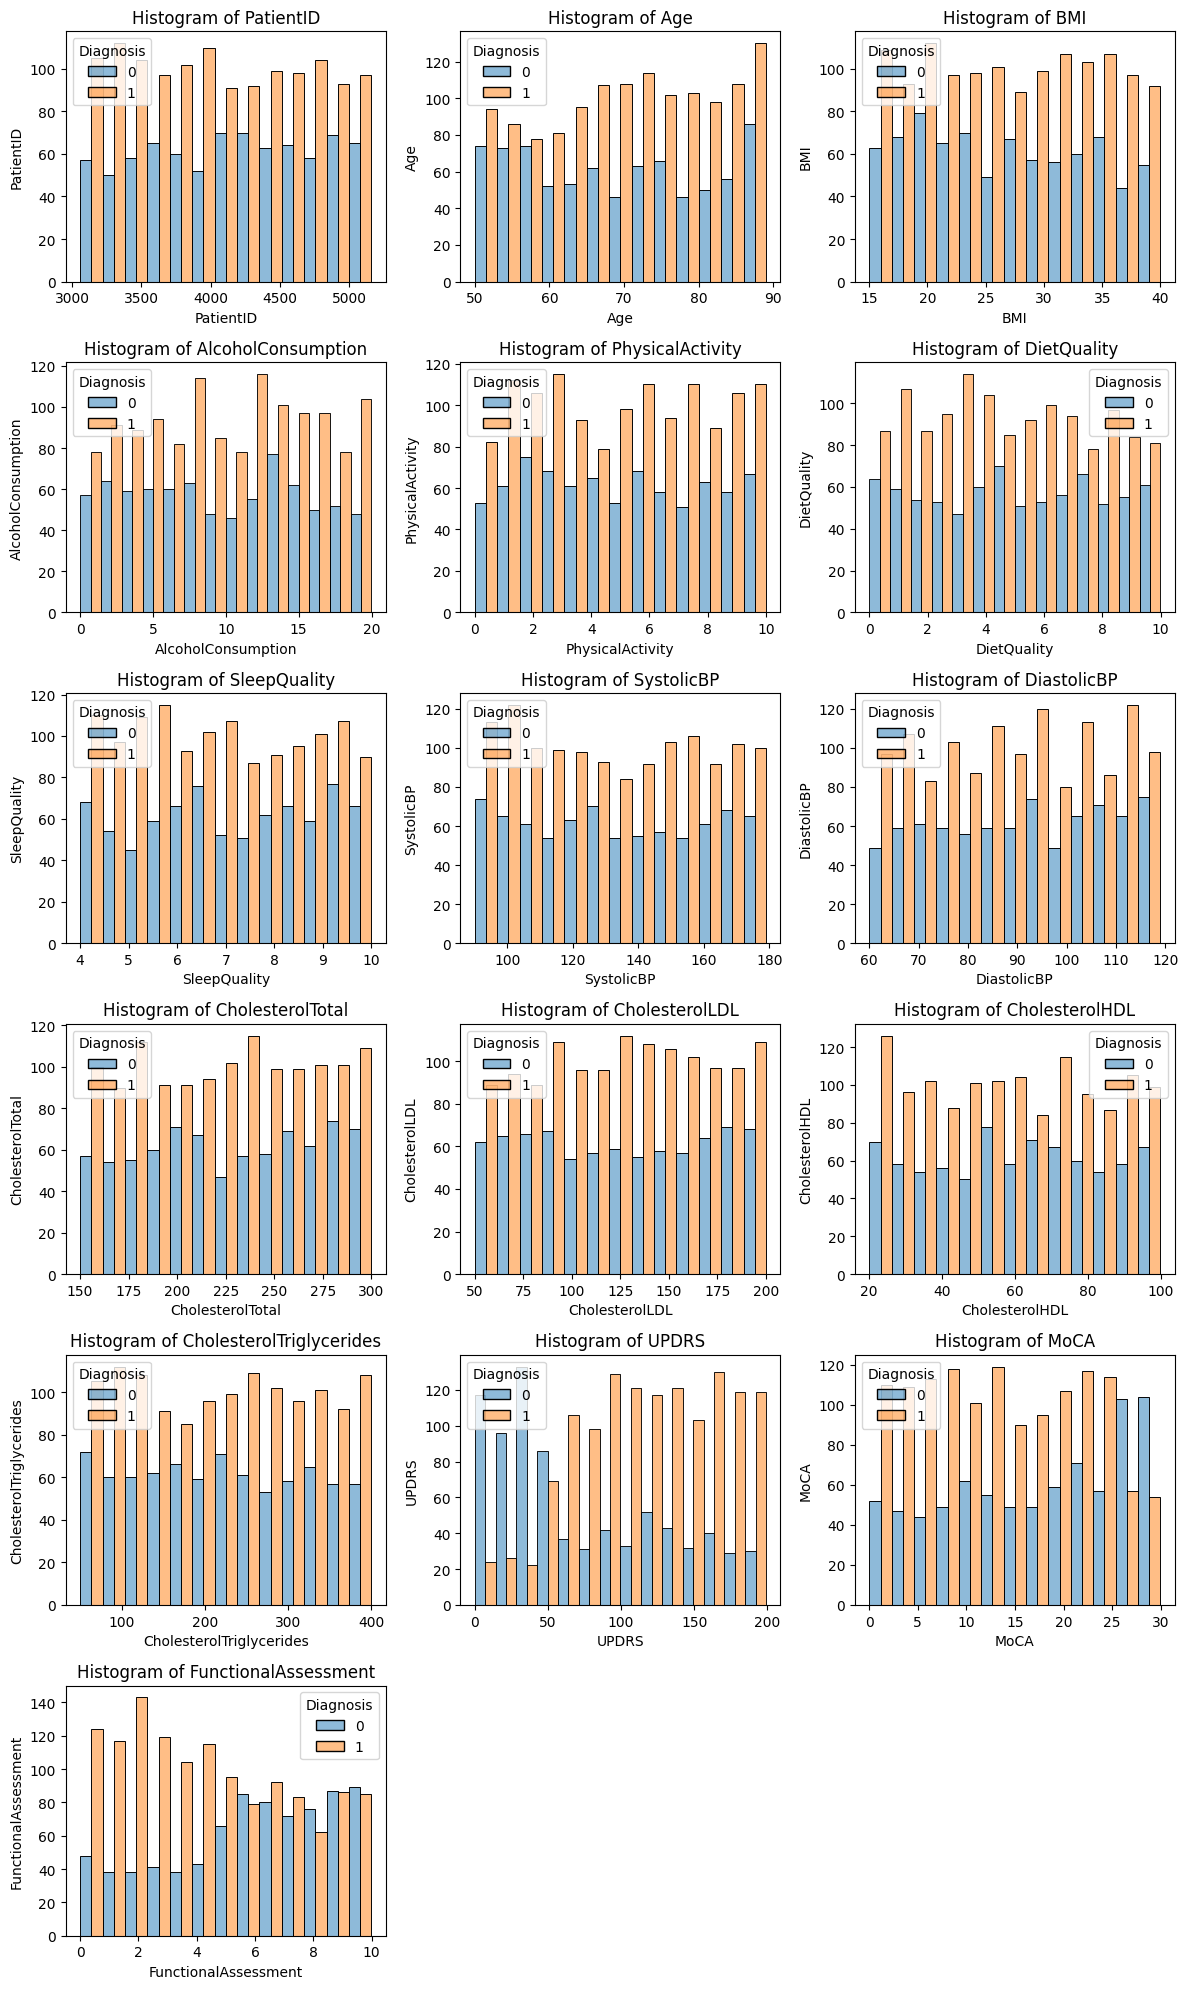

In [ ]:
#  Create a histogram of each feature categorized by diagnosis
plot_columns = 3
plot_rows = math.ceil(len(cont_columns) / plot_columns)
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,20))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(cont_columns):
    sns.histplot(x=col, hue='Diagnosis',  data=df, ax=axs[i], multiple='dodge', alpha=0.5)
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_ylabel(col)
axs[-2].set_visible(False)
axs[-1].set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
#  For continous variables, what is the correlation to parkinsons?  For this, we will use the
y_col = 'Diagnosis'
x_vars, y_vars, corr_coefs, p_vals = [], [], [], []
for col in cont_columns:
    x_vars.append(col)
    y_vars.append('Positive_Diagnosis')
    coef, p_val = pointbiserialr(df[col], df[y_col])
    corr_coefs.append(coef)
    p_vals.append(p_val)
df_corr_p_val = pd.DataFrame({'x_variable': x_vars, 'y_variable':y_vars, 'correlation_coef': corr_coefs, 'p_value': p_vals}).sort_values('p_value', ascending=True)
df_corr_p_val

,x_variable,y_variable,correlation_coef,p_value
13,UPDRS,Positive_Diagnosis,0.3980,7.6427e-81
15,FunctionalAssessment,Positive_Diagnosis,-0.2250,1.4207e-25
14,MoCA,Positive_Diagnosis,-0.1731,1.2668e-15
1,Age,Positive_Diagnosis,0.0653,2.7049e-03
0,PatientID,Positive_Diagnosis,-0.0435,4.5943e-02
6,SleepQuality,Positive_Diagnosis,-0.0433,4.7016e-02
3,AlcoholConsumption,Positive_Diagnosis,0.0367,9.2313e-02
2,BMI,Positive_Diagnosis,0.0301,1.6724e-01
8,DiastolicBP,Positive_Diagnosis,-0.0291,1.8239e-01
5,DietQuality,Positive_Diagnosis,-0.0230,2.9170e-01


In [ ]:
filter = (np.abs(df_corr_p_val['correlation_coef']) > 0.10) & (df_corr_p_val['p_value'] < 0.01)
df_corr_p_val[filter]
corr_cols = list(df_corr_p_val[filter].x_variable)
corr_cols

['UPDRS', 'FunctionalAssessment', 'MoCA']

6 3


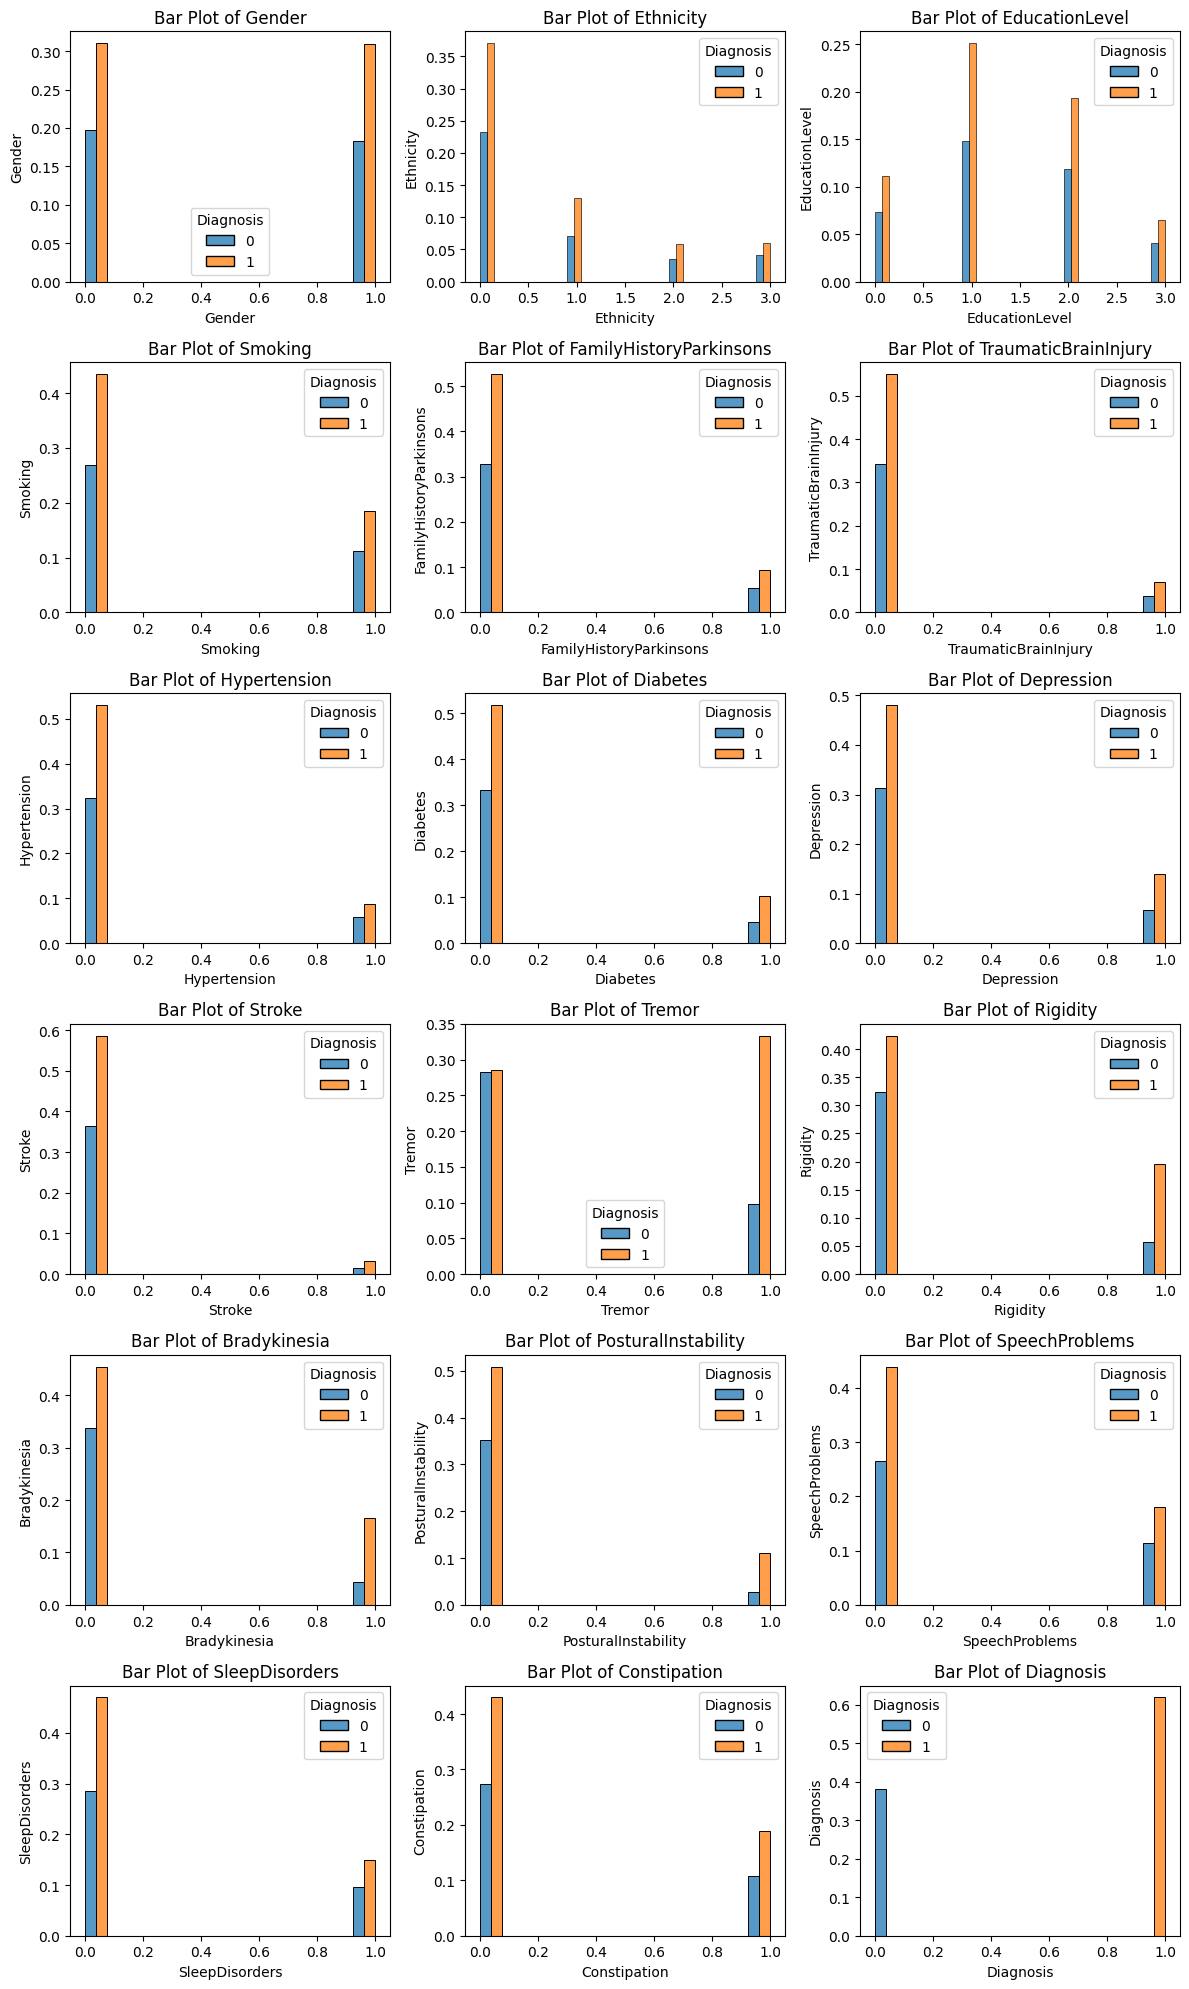

In [ ]:
#  Box plot of variables
plot_columns = 3
plot_rows = math.ceil(len(cat_columns) / plot_columns)
print(plot_rows, plot_columns)
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,20))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(cat_columns):
    sns.histplot(x=col, hue='Diagnosis', stat='proportion', multiple='dodge', data=df, ax=axs[i])
    axs[i].set_title(f'Bar Plot of {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
#  Function to score accuracy of models
def evaluate_models(X, y, feature_case, cv=5):
    """
    Function to evaluate 5 different models and return cross-validation results.

    Parameters:
    X: pd.DataFrame or np.array, Features
    y: pd.Series or np.array, Target binary variable
    cv: int, number of cross-validation folds (default=5)

    Returns:
    pd.DataFrame with mean cross-validation scores for each model
    """
    scaler = StandardScaler()
    X = X.copy()

    X_scaled = scaler.fit_transform(X)

    # Define models to test
    models = {
        'Random Forest': RandomForestClassifier(),
    }

    # Dictionary to store results
    results = {}

    # Loop over models and calculate cross-validation score
    for name, model in models.items():
        scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')  # You can use other metrics like 'roc_auc', 'f1', etc.
        results[name] = scores.mean()


    # Convert the results to a DataFrame for easy comparison
    results_df = pd.DataFrame(results.items(), columns=['Model', 'Mean CV Accuracy'])
    results_df['Feature_set_case'] = feature_case

    return results_df

In [ ]:
#  For categorical variables, what is the correlation to parkinsons?  For this, we will use the
y_col = 'Diagnosis'
x_vars, y_vars, corr_coefs, p_vals = [], [], [], []
for col in cat_columns[:-1]:
    x_vars.append(col)
    y_vars.append('Positive_Diagnosis')
    coef, p_val = pointbiserialr(df[col], df[y_col])
    corr_coefs.append(coef)
    p_vals.append(p_val)
df_corr_p_val = pd.DataFrame({'x_variable': x_vars, 'y_variable':y_vars, 'correlation_coef': corr_coefs, 'p_value': p_vals}).sort_values('p_value', ascending=True)
df_corr_p_val

,x_variable,y_variable,correlation_coef,p_value
10,Tremor,Positive_Diagnosis,0.2744,1.1482e-37
11,Rigidity,Positive_Diagnosis,0.1856,9.0407e-18
12,Bradykinesia,Positive_Diagnosis,0.1840,1.7143e-17
13,PosturalInstability,Positive_Diagnosis,0.1475,1.0357e-11
8,Depression,Positive_Diagnosis,0.0591,6.7003e-03
7,Diabetes,Positive_Diagnosis,0.0571,8.8235e-03
9,Stroke,Positive_Diagnosis,0.0281,1.9760e-01
16,Constipation,Positive_Diagnosis,0.0253,2.4543e-01
5,TraumaticBrainInjury,Positive_Diagnosis,0.0230,2.9230e-01
0,Gender,Positive_Diagnosis,0.0168,4.4012e-01


In [ ]:
filter = (np.abs(df_corr_p_val['correlation_coef']) > 0.10) & (df_corr_p_val['p_value'] < 0.01)
df_corr_p_val[filter]
corr_colsb = list(df_corr_p_val[filter].x_variable)
corr_colsb

['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability']

In [ ]:
corr_cols.extend(corr_colsb)
corr_cols

['UPDRS',
 'FunctionalAssessment',
 'MoCA',
 'Tremor',
 'Rigidity',
 'Bradykinesia',
 'PosturalInstability']

In [ ]:
df_model_scores = pd.DataFrame()
X = df.iloc[:,1:-1].copy()
y = X.pop('Diagnosis')

baseline = evaluate_models(X,y, 'Baseline Case')
df_model_scores = pd.concat([df_model_scores, baseline])
df_model_scores

,Model,Mean CV Accuracy,Feature_set_case
0,Random Forest,0.9192,Baseline Case


In [ ]:
df_cont_scaled = (df[cont_columns[1::]] - df[cont_columns[1::]].mean())/df[cont_columns[1::]].std()
df_merged = pd.merge(df_cont_scaled, df[cat_columns], left_index=True, right_index=True)
df_merged

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,...,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,1.3281,-1.0529,-0.8673,-1.2577,-0.3548,1.3043,-0.1781,-1.7730,-0.0922,0.5063,...,0,0,1,0,0,0,0,0,0,0
1,0.4656,-1.5208,-0.7056,1.1737,1.2536,-0.7953,1.1048,-0.8352,-0.3753,0.6360,...,0,0,0,1,0,1,0,1,0,1
2,0.0343,-1.6428,-1.3712,-1.6615,0.5522,1.6732,-0.7818,0.1612,1.3886,-0.1715,...,0,0,1,0,0,0,1,0,1,1
3,-1.5181,-1.6308,-0.7109,-1.2597,0.6275,-1.5975,0.4634,-0.7180,1.2269,0.2339,...,0,0,1,1,1,0,0,0,1,1
4,1.5005,-1.1922,-0.0466,-1.3242,-0.0889,1.3504,-0.7063,0.2198,1.3112,-0.4077,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,1.5005,1.5641,0.4632,0.1070,0.3601,-0.3995,-1.5742,0.4542,-0.8141,-0.6316,...,0,0,1,0,0,0,1,1,0,0
2101,-0.2244,0.8997,-1.5937,-1.6978,-0.0305,-0.3732,-1.1591,0.3370,-1.7590,-0.3245,...,0,0,0,0,0,1,0,1,1,1
2102,-0.3969,-0.6076,-0.6837,0.2623,-1.5942,1.5649,1.2935,-0.6594,-1.5488,-1.4883,...,0,1,0,0,0,0,1,1,0,1
2103,-0.7419,-1.4343,-1.7141,-0.9465,1.6314,0.7374,-0.1781,0.3956,0.1234,-1.6845,...,0,0,1,0,1,0,0,1,1,1


In [ ]:
#  Assign X and y and calculate model scores.
X_1 = df_merged.copy()
y = X_1.pop('Diagnosis')
normalize_cont = evaluate_models(X_1,y, 'Normalize Continuous Variables')
df_model_scores = pd.concat([df_model_scores, normalize_cont]).reset_index(drop=True)
df_model_scores

,Model,Mean CV Accuracy,Feature_set_case
0,Random Forest,0.9192,Baseline Case
1,Random Forest,0.9173,Normalize Continuous Variables


In [ ]:
#  OH encode columns of the dataframe.
cat_columns[:-1]
X_2 = df.iloc[:,1:-1].copy()
y = X_2.pop('Diagnosis')
X_encoded = pd.get_dummies(X_2, columns=cat_columns[:-1])
OH_encoded = evaluate_models(X_encoded,y, 'One Hot Encode Categorical')
df_model_scores = pd.concat([df_model_scores, OH_encoded]).reset_index(drop=True)
df_model_scores

,Model,Mean CV Accuracy,Feature_set_case
0,Random Forest,0.9192,Baseline Case
1,Random Forest,0.9173,Normalize Continuous Variables
2,Random Forest,0.9230,One Hot Encode Categorical


In [ ]:
# Run model performance only with columns with high correlation.
X3 = df[corr_cols].copy()
y = df['Diagnosis'].copy()
df_model_corr_cols = evaluate_models(X3,y, 'Use Featues with High Correlation')
df_model_scores = pd.concat([df_model_scores, df_model_corr_cols]).reset_index(drop=True)
df_model_scores

,Model,Mean CV Accuracy,Feature_set_case
0,Random Forest,0.9192,Baseline Case
1,Random Forest,0.9173,Normalize Continuous Variables
2,Random Forest,0.9230,One Hot Encode Categorical
3,Random Forest,0.9349,Use Featues with High Correlation


In [ ]:
columns_to_encode = df[corr_cols].columns[3::]
df_encoded = pd.get_dummies(df[corr_cols], columns=columns_to_encode)
X3_encoded = df_encoded.copy()
y = df['Diagnosis'].copy()
df_OH_corr_cols = evaluate_models(X3_encoded,y, 'Featues with High Corr. and OH encoding')
df_model_scores = pd.concat([df_model_scores, df_OH_corr_cols]).reset_index(drop=True)
df_model_scores

,Model,Mean CV Accuracy,Feature_set_case
0,Random Forest,0.9192,Baseline Case
1,Random Forest,0.9173,Normalize Continuous Variables
2,Random Forest,0.9230,One Hot Encode Categorical
3,Random Forest,0.9349,Use Featues with High Correlation
4,Random Forest,0.9373,Featues with High Corr. and OH encoding


In [ ]:
df_model_scores.sort_values('Mean CV Accuracy', ascending=False)

,Model,Mean CV Accuracy,Feature_set_case
4,Random Forest,0.9373,Featues with High Corr. and OH encoding
3,Random Forest,0.9349,Use Featues with High Correlation
2,Random Forest,0.9230,One Hot Encode Categorical
0,Random Forest,0.9192,Baseline Case
1,Random Forest,0.9173,Normalize Continuous Variables


In [ ]:
#  plot a confusion matrix when given the actual y_test and Y_predicted
def plot_confusion_matrix(y_test, y_predict):
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_predict)
    #  plot confusion matrix

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

    # Step 3: Add labels, title, and axis names
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Step 4: Show the plot
    plt.show()

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.9251854599406528
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       150
           1       0.95      0.91      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.92      0.91       421
weighted avg       0.92      0.91      0.92       421



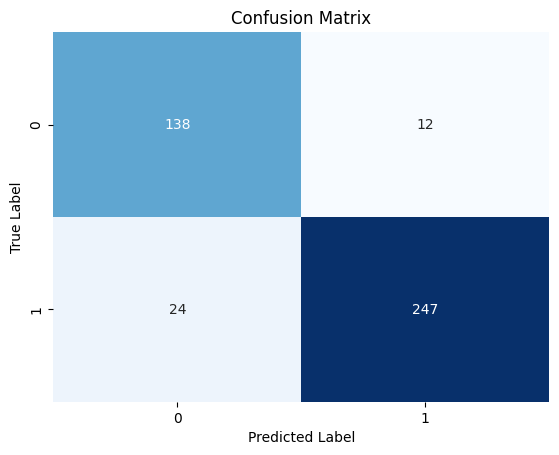

In [ ]:
#  Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider at each split
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # Metric to evaluate
    n_jobs=-1,               # Use all available cores
    verbose=1                # Print progress during fitting
    )

# Fit GridSearch to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use the best model to make predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model with a classification report
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
import pickle

# Simpan model ke file .pkl menggunakan pickle
model_filepath = "best_rf_model_pickle.pkl"
with open(model_filepath, 'wb') as file:
    pickle.dump(best_rf_model, file)

print(f"Model disimpan ke: {model_filepath}")


Model disimpan ke: best_rf_model_pickle.pkl


In [ ]:
# Muat model dari file .pkl menggunakan pickle
with open(model_filepath, 'rb') as file:
    loaded_model = pickle.load(file)

print(f"Model berhasil dimuat dari: {model_filepath}")

# Lakukan prediksi
y_pred_loaded = loaded_model.predict(X_test)

# Evaluasi hasil prediksi
target_names = ["Tidak Terdiagnosis Parkinson", "Terdiagnosis Parkinson"]
print("Classification Report:")
print(classification_report(y_test, y_pred_loaded, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_loaded)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


In [ ]:
import numpy as np

# Pastikan input data memiliki dimensi dan format yang sesuai
def validate_input(input_data, model, expected_features):
    if not isinstance(input_data, (list, np.ndarray)):
        raise ValueError("Input data harus berupa list atau numpy array.")

    input_data = np.array(input_data)

    if input_data.ndim == 1:
        input_data = input_data.reshape(1, -1)  # Ubah menjadi 2D jika 1D

    if input_data.shape[1] != len(expected_features):
        raise ValueError(
            f"Input data harus memiliki {len(expected_features)} fitur, tetapi memiliki {input_data.shape[1]} fitur."
        )

    # Prediksi menggunakan model
    predictions = model.predict(input_data)
    return predictions

# Contoh penggunaan
expected_features = df.drop(columns=['Diagnosis']).columns  # Sesuaikan kolom dengan pelatihan
input_data = [[65, 1, 2.5, 20.5, 0.01, 0.001, 0.005, 0.015, 0.045, 0.002, 0.005, 0.02, 0.03, 0.1, 0.2, 0.3, 0.02, 0.5, 0.6, 0.7, 0.05, 0.08]]
try:
    testing = validate_input(input_data, best_rf_model, expected_features)
    print("Prediksi:", testing)
except ValueError as e:
    print("Error:", e)


In [37]:
import json
import pickle

# Nama file
ipynb_file = "Parkinsons_classifier.ipynb"  # Ganti dengan nama file Anda
pkl_file = "Parkinsons_classifier.pkl"      # Nama file hasil ekspor

# Membaca file .ipynb sebagai JSON
with open(ipynb_file, "r", encoding="utf-8") as f:
    notebook_data = json.load(f)

# Menyimpan data ke format .pkl
with open(pkl_file, "wb") as f:
    pickle.dump(notebook_data, f)

print(f"File {ipynb_file} berhasil diekspor ke {pkl_file}")


FileNotFoundError: [Errno 2] No such file or directory: 'Parkinsons_classifier.ipynb'